<H1><center>Project 2<BR><BR>
Perceptrons</center></H1>

<H2>Task 1: Identifying fake news
</H2>

<P>Read <a href="https://www.technologyreview.com/s/609717/can-ai-win-the-war-against-fake-news/">this article</a> about how machine learning is being used to detect fake news stories.</P>

<P>Please address (minimum 200 words) the following questions in the space below. What is your definition of "fake news"? When might two different groups of people read the same story with one group understanding it to be "real" and one group understanding it to be "fake"? What are some different ways that fake news might be combatted?</P>

Fake news are articles, headlines, and photos that are intentionally and verifiably false. Fake news is often created with the intention of misconstruing false information or increasing views/clicks to generate ad revenue. Fake news has successfully appealed to people's various opinions, emotions, and value systems to convince people of incorrect information. When two different groups of people with different opinions on how a certain topic should be, it is very possible for them to read the same story with one group understanding it to be real and one group understanding it to be fake. Finding a news article that aligns with one's belief makes an individual feel validated in their thoughts and strengthens their opinion, even if the article is verifiably false. The article in the MIT Technology Review explains the different ways that AI can be used to discover fake news. By growing the training data and analyzing a wide array of various articles, the AI algorithm can strengthen its ability to determine if an article or photo was purposely fabricated. We found it interesting that the article explores how AI can be used as a key combatant of fake news but can also be leveraged to quickly generate even more fake news, beginning an "arms race" of AI.

<H2>Task 2: Using Perceptrons to predict survivors of the Titanic
</H2>

<P>This from <a href="https://www.kaggle.com/c/titanic">Kaggle</a>:

<blockquote>
<P>The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.</P>

<P>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.</P>
</blockquote>

<P>Together with the downloaded file containing this notebook, you should find a csv file named <code>titanic.csv</code> containing information about passengers on the Titanic and whether the passenger survived the tragedy. The first row of the file contains header information and each subsequent row contains information about a passenger. There are nine columns of feature values, and the tenth column contains labels, -1 or 1, indicating whether the passenger did not survive or did survive, respectively. The features in order of how they appear in the file are:</P>

<ol>
<li>Ticket class, 1=First, 2=Second, 3=Third</li>
<li>Sex, 0=male, 1=female</li>
<li>Age in years</li>
<li>Number of siblings and spouses aboard the Titanic</li>
<li>Number of parents and children aboard the Titanic</li>
<li>Passenger fare in dollars</li>
<li>Whether the passenger's port of embarkation was Cherbourg</li>
<li>Whether the passenger's port of embarkation was Queenstown</li>
<li>Whether the passenger's port of embarkation was Southampton</li>
</ol>
<P>In this task, you will use the <code>sklearn</code> perceptron algorithm to predict whether a passenger survived the Titanic.</P>

<P>Write code in the space below to read in the <code>titanic.csv</code> file and store the feature vectors in an array <code>X</code> and the labels in an array <code>y</code>.</P>

In [20]:
# Read in data and store feature vectors in array X and labels in array y

import numpy as np
def load(csv_file):
    """given a CSV file where each row is a data point,
    with the last column being the label and the rest being the vector,
    return a tuple consisting of two elements:
    (1) a matrix where each row is a vector, in the same order as they appear in the file
    (2) an array where the ith element is the label of the ith vector above.
    """
    # Hint: Use https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html
    DATA = np.loadtxt(csv_file, delimiter=',', skiprows=1)
    
    X = DATA[:,:-1] #matrix where each row is a vector, in the same order as they appear in the file
    y = DATA[:,-1:] #an array where the ith element is the label of the ith vector above
    
    return (X, y)

X,y = load("titanic.csv")




<P>Write code in the space below to split the data into <em>training</em> and <em>testing</em> data. Use 80% of the data for <em>training</em> and 20% of the data for <em>testing</em>. You may use the <code>train_test_split</code> function from <code>sklearn</code> here. Set <code>random_state=0</code> for consistent results.</P>

In [21]:
# Split data into 80% training and 20% testing. Set random_state=0.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


<P>Write code in the space below that uses <code>sklearn</code> to create a Perceptron, setting the number of epochs to be 20 and the random_state to be 0. Train the perceptron on the <em>training</em> data. Once trained, report the accuracy of the perceptron first on classifying the <em>training</em> data and second on classifying the <em>testing</em> data. Finally, print out the weights for the 9 features, as learned by the Perceptron.</P>

In [22]:
# Create sklearn Perceptron with 20 epochs.
# Train perceptron and report its classification accuracy on both training data and testing data.
# Output weights of 9 features as learned by the Perceptron.

from sklearn import linear_model  # Using sklearn Perceptron classifier
perceptron = linear_model.Perceptron(max_iter=20, random_state=0)
perceptron.fit(X_train, y_train)
print('Accuracy of perceptron on training: ' + str(perceptron.score(X_train, y_train)))
print('Accuracy of perceptron on testing: ' + str(perceptron.score(X_test, y_test)))

print(perceptron.coef_)


Accuracy of perceptron on training: 0.7696629213483146
Accuracy of perceptron on testing: 0.8212290502793296
[[ -52.      758.      -16.74   -470.      -83.       30.1803   47.
    78.      -74.    ]]


/Users/kimberleykimura/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<P>Please answer the following questions.</P>

<P><font color="maroon"><u>Are the feature vectors linearly separable? How do you know?</u></font></P>

No, they are not linearly separable since the accuracy of the perceptron is less than 100%. We were unable to find a line that perfectly separates survivors vs non-survivors.



<P><font color="maroon"><u>Based on the 9 feature weights, what feature contributes most toward predicting survival?</u></font></P>

Based on the 9 feature weights, the second feature, sex, contributes most towards predicting survival.


<P><font color="maroon"><u>Were younger or older passengers more likely to survive?</u></font></P>

Younger passengers are more likely to survive as age and survival are negatively correlated.



<P><font color="maroon"><u>Were passengers that paid a higher fare more likely to survive?</u></font></P>

Yes, passenger fare in dollars (the 6th feature) is positively correlated to survival. Therefore, passengers who paid more were more likely to survive.

<P><font color="maroon"><u>Passengers were most likely to survive if they embarked from which of the three ports?</u></font></P>

Passengers were most likely to survive if they embarked from Queenstown.



<H2>Task 3: Implementing your own Perceptron
</H2>

<P>In this task, you will implement your own perceptron learning algorithm. You may use the <code>numpy</code> and <code>matplotlib</code> libraries, but <font color="red">you should <em>not</em> use any part of the <code>sklearn</code> library</font>.

<P>The file <code>dataset.csv</code> contains 500 examples labeled either as -1 or 1. The examples have 2-dimensional feature vectors, i.e., two features each. The file contains a header line. Write code below to read in the file and store the feature vectors in an array <code>X</code> and the labels in an array <code>y</code>. In order to visualize the data (since it is two-dimensional), you should also plot the data as a scatter plot using the <code>matplotlib</code> function <code>scatter</code>. When plotting the data with the <code>scatter</code> function, you can set the color of points based on their labels (-1 or 1) in the <code>y</code> array by providing the argument "<code>c=y</code>".</P>

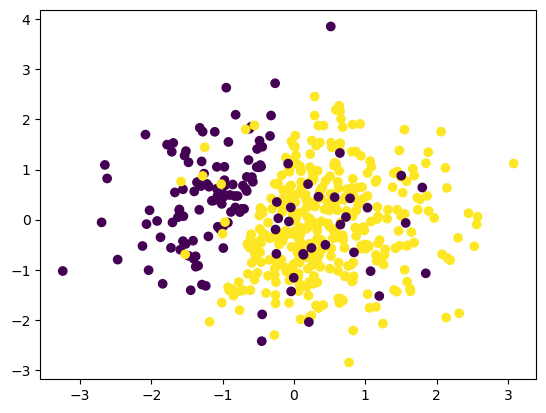

In [23]:
# Read in data and store feature vectors in array X and labels in array y.
# Also display scatter plot of data.

import matplotlib.pyplot as plt

X,y = load('dataset.csv') #using load function from Task 2

plt.scatter(X[:,0], X[:,1], c=y)

<P>Write a function <code>shuffle</code> that takes as input two arrays <code>X</code> and <code>y</code> with the same number of rows and returns two arrays containing the same data as the input arrays but with their rows randomly permuted. Hint: the <code>sklearn</code> function <code>random.shuffle</code> may be useful. However, if you shuffle the two arrays independently then labels in the <code>y</code> array won't correspond to the feature vectors in the <code>X</code> array. As an alternative, one approach is to combine the two arrays into a single array (e.g., with the <code>numpy</code> function either <code>hstack</code> or <code>concatenate</code>), randomly shuffle this array, and then split the array back into two arrays <code>X</code> and <code>y</code>.</P>

In [24]:
# shuffle function takes two arrays, X and y, as input,
# and returns versions of the two arrays where their rows have been randomly permuted
from sklearn import utils

def shuffle(X, y):
    combined = np.hstack((X,y))
    shuffled = utils.shuffle(combined)
    X = shuffled[:,:-1]
    y = shuffled[:,-1:]
    return (X,y)
    
#a=np.array([[1,2] ,[3,4], [5,6]])
#b=np.array([[7],[8],[9]])
#shuffle(a,b)

<P>Write code to split the data into four arrays (<code>X_train</code>, <code>y_train</code>, <code>X_test</code>, and <code>y_test</code>) so that 60% of the data corresponds to <em>training</em> data and 40% of the data corresponds to <em>testing</em> data. Of course, before splitting the data into <em>training</em> data and <em>testing</em> data, you should first shuffle the arrays <code>X</code> and <code>y</code> to guard against the case when the data was stored in the file in some sorted order (we want the <em>training</em> and <em>testing</em> data both to be representative of the entire data distribution).</P>

In [25]:
# Shuffle data and then separate data into 60% training data and 40% testing data

shuffle(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 0)




<P>In the next part, you will be writing a function to train a perceptron. For now, you'll write a <em>simplified</em> version where the bias term is set to zero and never updated. Also, in this simplified version, you will <em>not</em> shuffle the data each epoch. In later versions, you will write more advanced perceptron training functions that update the bias term, shuffle the data each epoch, and compute <em>averaged</em> perceptrons. Ultimately, we'll execute both simplified and advanced versions of the perceptron training algorithm and see how the results change as we add more advanced aspects to the training algorithm.</P>

<P>Write a function <code>perceptron_train_version1</code> that trains a perceptron. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the perceptron training algorithm which learns a weight vector <code>w</code> that defines a separating hyperplane. The number of epochs should be 20. The function should <em>not</em> learn or update a bias term (we'll get to this later). The function should set a bias term <code>b</code> to be 0 and never change it. The function also should <em>not</em> shuffle data at any point (we'll get to this later, too). The function should return two elements, the learned weight vector <code>w</code> and a bias term <code>b</code>, which simply has the value of zero.</P>

In [26]:
# The perceptron_train_version1 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The function returns the weight vector w that it learns as well as a bias term of 0.

def perceptron_train_version1 (X,y):
    num_epochs = 20
    b=0
    w=np.zeros(X.shape[1])
    
    #print(w.shape)
    
    for epoch in range(num_epochs):
            for i in range(X.shape[0]): 
                predicted = np.dot(X[i], w)
                #print(predicted)
                if (y[i]*(predicted) <= 0).all():
                    w = w + y[i]*X[i]
    return (w, b)



<P>Write a function <code>predict</code> that predicts the class of a data point. The function should take three inputs: a weight vector <code>w</code>, a bias term <code>b</code>, and a single feature vector <code>x</code>. The weight vector <code>w</code> and the feature vector <code>x</code> should have the same size. The function should compute the appropriate weighted sum and then apply the activation function so that either -1 or 1 is returned.</P>

In [27]:
# Using a weight vector w and a bias term b, the predict function 
# predicts the class of a data point x, returning either -1 or 1.

def predict (w, b, x):
    activation = w[0]
    for i in range(len(x)):
        activation += (w[i]*x[i] + b)
        #print(activation)
    if activation >= 0:
        return 1
    else:
        return -1


<P>Write a function <code>score</code> that takes four inputs, a weight vector <code>w</code>, a bias term <code>b</code>, an array <code>X</code> of feature vectors and an array <code>y</code> of labels. The function uses the weight vector <code>w</code> and the bias term <code>b</code> to make classification predictions for each feature vector in <code>X</code>. The predictions are compared to the labels in <code>y</code> and the accuracy is returned, i.e., the percentage of predictions that correctly correspond to labels in <code>y</code> is returned.</P>

In [28]:
# The score function uses the weight vector w and the bias term b 
# to predict the class of each feature vector in X.
# The predicted classes are compared to the labels in y and the accuracy of the predictions is returned.

def score (w, b, X, y):
    total = X.shape[0] #total # of data points
    correct = 0
    
    for i in range(len(X)):
        if (predict(w, 0, X[i]) == y[i]):
            correct += 1
    
    return (correct/total)


<P>Use your <code>perceptron_train_version1</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [29]:
# Assess the accuracy of your perceptron (version 1) on the training data and on the testing data

ptv1 = perceptron_train_version1 (X_train, y_train)
w = ptv1[0]


<P><font color="maroon"><u>What is the accuracy of your <em>version1</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version1</em> perceptron on the <em>testing</em> data?</u></font></P>

In [30]:
print('Training accuracy:', score (w, 0, X_train, y_train))
print('Testing accuracy:', score(w, 0, X_test, y_test))

Training accuracy: 0.8133333333333334
Testing accuracy: 0.805


<P>Write a function <code>perceptron_train_version2</code> that trains a perceptron but this time, unlike version 1 above, the function should update the bias term. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the perceptron training algorithm which learns a weight vector <code>w</code> <em>and</em> a bias term <code>b</code>. The number of epochs should be 20. The function should <em>not</em> shuffle data at any point (we'll get to this later). The function should return two elements, the learned weight vector <code>w</code> and the learned bias term <code>b</code>.</P>

In [31]:
# The perceptron_train_version2 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The function returns the weight vector w and the bias term b that it learns.


def perceptron_train_version2 (X,y):
    num_epochs = 20
    b=0
    w=np.zeros(X.shape[1])
    
    #print(w.shape)
    
    for epoch in range(num_epochs):
            for i in range(X.shape[0]): 
                predicted = np.dot(X[i], w)
                #print(predicted)
                if (y[i]*(predicted+b) <= 0).all():
                    w = w + y[i]*X[i]
                    b = b + y[i]                   
    return (w, b)






<P>Use your <code>perceptron_train_version2</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [32]:
# Assess the accuracy of your perceptron (version 2) on the training data and on the testing data
ptv2 = perceptron_train_version2 (X_train, y_train)
w = ptv2[0]


<P><font color="maroon"><u>What is the accuracy of your <em>version2</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version2</em> perceptron on the <em>testing</em> data?</u></font></P>

In [33]:
print('Training accuracy:', score (w, 0, X_train, y_train))
print('Testing accuracy:', score(w, 0, X_test, y_test))

Training accuracy: 0.89
Testing accuracy: 0.88


<P>Write a function <code>perceptron_train_version3</code> that trains a perceptron but this time, unlike version 2 above, the function should shuffle the data at the start of each epoch. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the perceptron training algorithm which learns a weight vector <code>w</code> <em>and</em> a bias term <code>b</code>. The number of epochs should be 20. The function should shuffle the data at the start of each epoch. The function should return two elements, the learned weight vector <code>w</code> and the learned bias term <code>b</code>.</P>

In [34]:
# The perceptron_train_version3 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The data is shuffled at the start of each epoch.
# The function returns the weight vector w and the bias term b that it learns.

def perceptron_train_version3 (X,y):
    num_epochs = 20
    b=0
    w=np.zeros(X.shape[1])
    
    #print(w.shape)
    
    for epoch in range(num_epochs):
        X,y = shuffle(X,y)
        for i in range(X.shape[0]): 
            predicted = np.dot(X[i], w)
            #print(predicted)
            if (y[i]*(predicted+b) <= 0).all():
                w = w + y[i]*X[i]
                b = b + y[i]                   
    return (w, b)


<P>Use your <code>perceptron_train_version3</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [35]:
# Assess the accuracy of your perceptron (version 3) on the training data and on the testing data
ptv3 = perceptron_train_version3 (X_train, y_train)
w = ptv3[0]


<P><font color="maroon"><u>What is the accuracy of your <em>version3</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version3</em> perceptron on the <em>testing</em> data?</u></font></P>

In [36]:
print('Training accuracy:', score (w, 0, X_train, y_train))
print('Testing accuracy:', score(w, 0, X_test, y_test)) 

Training accuracy: 0.8766666666666667
Testing accuracy: 0.865


<P>Write a function <code>perceptron_train_version4</code> that trains a perceptron but this time, unlike version 3 above, rather than return the final weight vector and bias term, the function will compute an <em>averaged</em> perceptron and return the average weight vector and the average bias term. The function should take as input an array <code>X</code> of feature vectors and an array <code>y</code> of labels. It should implement the <em>averaged</em> perceptron training algorithm which keeps track of the average weight vector and bias term, where the average is over all intermediary weight vectors and bias terms that it computes throughout its learning. The number of epochs should be 20. The function should shuffle the data at the start of each epoch. The function should return two elements, the average weight vector and the average bias term.</P>

In [37]:
# The perceptron_train_version4 function takes an array X of feature vectors and an array y of labels as input.
# The function trains a perceptron. The number of epochs should be 20.
# The data is shuffled at the start of each epoch.
# The function implements the *averaged* perceptron learning algorithm.
# The function returns the *average* weight vector w and the *average* bias term b that it learns.


def perceptron_train_version4 (X,y):
    num_epochs = 20
    b=0
    w=np.zeros(X.shape[1])
    w_tot = 0
    b_tot = 0
    
    
    #print(w.shape)
    
    for epoch in range(num_epochs):
        X,y = shuffle(X,y)
        for i in range(X.shape[0]): 
            predicted = np.dot(X[i], w)
            #print(predicted)
            if (y[i]*(predicted+b) <= 0).all():
                w = w + y[i]*X[i]
                w_tot = w_tot + w
                b = b + y[i]  
                b_tot = b_tot + b
    
    return (w_tot/num_epochs, b_tot/num_epochs)


<P>Use your <code>perceptron_train_version4</code> function to train a perceptron on the <em>training</em> data. Then use the <code>score</code> function to assess the accuracy of the perceptron first on the <em>training</em> data and second on the <em>testing</em> data.</P>

In [38]:
# Assess the accuracy of your perceptron (version 4) on the training data and on the testing data
ptv4 = perceptron_train_version4 (X_train, y_train)
w = ptv4[0]




<P><font color="maroon"><u>What is the accuracy of your <em>version4</em> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of your <em>version4</em> perceptron on the <em>testing</em> data?</u></font></P>

In [39]:
print('Training accuracy:', score (w, 0, X_train, y_train))
print('Testing accuracy:', score(w, 0, X_test, y_test))

Training accuracy: 0.8633333333333333
Testing accuracy: 0.865


<P>Please answer the following question that relates to the relative performance of the perceptron when trained using version 1, version 2, version 3, and version 4:</P>
<P><font color="maroon"><u>Which perceptron training advancement led to the biggest increase in accuracy on the <em>testing</em> data: updating the bias term, shuffling the data at the start of each epoch, using the average weight vector and bias term?</u></font></P>

The second training advancement of updating the bias term led to the biggest increase in accuracy on the testing data.

<P>Throughout this task, you should not have used the <code>sklearn</code> library at all. For this final part, you should now use the <code>sklearn</code> library. Create an <code>sklearn</code> Perceptron setting the number of epochs to be 20 and the random_state to be 0. Train the perceptron on the <em>training</em> data and assess its accuracy on both the <em>training</em> data and the <em>testing</em> data.</P> 

In [40]:
# Create an sklearn Perceptron with the number of epochs set to 20 and the random_state set to 0.
# Train the perceptron and assess its accuracy on both the training data and the testing data.

from sklearn import linear_model  # Using sklearn Perceptron classifier
perceptron = linear_model.Perceptron(max_iter=20, random_state=0)
perceptron.fit(X_train, y_train)




Accuracy of perceptron on training: 0.8933333333333333
Accuracy of perceptron on testing: 0.885


/Users/kimberleykimura/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<P><font color="maroon"><u>What is the accuracy of the <code>sklearn</code> perceptron on the <em>training</em> data?</u></font></P>
<P><font color="maroon"><u>What is the accuracy of the <code>sklearn</code> perceptron on the <em>testing</em> data?</u></font></P>

In [41]:
print('Accuracy of perceptron on training: ' + str(perceptron.score(X_train, y_train)))
print('Accuracy of perceptron on testing: ' + str(perceptron.score(X_test, y_test)))

Accuracy of perceptron on training: 0.8933333333333333
Accuracy of perceptron on testing: 0.885


<P><font color="maroon"><u>How does the accuracy of your averaged perceptron (version 4) compare with that of <code>sklearn</code>'s perceptron?</u></font></P>

The sklearn's perceptron is more accurate than our averaged perceptron.

<H2>Submitting your work
</H2>

<P><font color="maroon"><u>Please indicate your name and the names of any partner that worked with you on this project:</u></font></P>

Name(s): Kimberley Kimura and Kate MacVicar

<P><font color="maroon"><u>Please indicate anyone else that you collaborated with in the process of doing the project:</u></font></P>

Collaborators: 

<P><font color="maroon"><u>When working on this project, approximately how many hours did you spend on each of (1) Task 1, (2) Task 2, (3) Task 3, and (4) Total?</u></font></P>

Hours on Task 1: 15 minutes
Hours on Task 2: 40 minutes
Hours on Task 3: 150 minutes
Total hours: 205 minutes

<P><font color="maroon"><u>When working on this project, did you abide by the <a href="https://www.wellesley.edu/studentlife/aboutus/honor">Honor Code</a> and is all of the work that you are submitting your own and/or your partner's?</u></font></P>

Abide by Honor Code: Kimberley Kimura and Kate MacVicar

<P><font color="maroon"><u>To submit this project, please upload your <code>Project2.ipynb</code> file to the <code>Project2</code> folder that the instructor created and shared with you in your Google drive.</u></font></P>